In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd # data manipulation
import numpy as np # numerical python linear algebra
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv('PB_All_2000_2021.csv',sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [6]:
df.size

31471

In [7]:
df.shape

(2861, 11)

In [8]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [9]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')

In [10]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [13]:
df=df.sort_values(by=['id','date'])
df.tail()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49
2860,22,2021-02-10,0.000,1.78,0.0,14.30,6.30,0.033,134.40,0.582,66.31


In [14]:
df=df.sort_values(by=['id','date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [15]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [16]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

***Week 2-23 June 2025***

In [18]:
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [19]:
X = df[['id', 'year']]
y = df[pollutants]

In [20]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [21]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [23]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

***In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.***

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 22.21825046040189
   R2: -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2: 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2: -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2: 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2: 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2: 0.7357918194149974



In [26]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33


In [27]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


##  Additional Improvisations for Better Prediction

###  1. Impute Missing Values Instead of Dropping

In [28]:

datetime_cols = df.select_dtypes(include=["datetime64"]).columns
print("DateTime Columns:", datetime_cols)



DateTime Columns: Index(['date'], dtype='object')


In [29]:
df_temp = df.drop(columns=datetime_cols)  

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_temp), columns=df_temp.columns)


In [30]:
from sklearn.impute import SimpleImputer
import pandas as pd


df_numeric = df.select_dtypes(include=["int64", "float64"])


imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_numeric),
    columns=df_numeric.columns
)


display(df_imputed.head())       

print(df_imputed.head())        

print("Shape after imputation:", df_imputed.shape)


,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1.0,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1.0,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1.0,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1.0,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1.0,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


    id    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4      CL
0  1.0  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   289.5
1  1.0  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090  1792.0
2  1.0  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200  2509.0
3  1.0  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377  1264.0
4  1.0  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134  1462.0
Shape after imputation: (2780, 10)


###  2. Feature Scaling (Standardization)

In [31]:
df.columns


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [32]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop(columns='O2')
y = df['O2']


X_numeric = X.select_dtypes(include=["int64", "float64"])

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

import pandas as pd
print("Scaled Features (first 5 rows):")
print(pd.DataFrame(X_train, columns=X_imputed.columns).head())



Scaled Features (first 5 rows):
         id       NH4      BSK5  Suspended       NO3       NO2       SO4  \
0 -1.528512 -0.286481 -1.039312  -0.773668  0.586989 -0.091957  0.465994   
1  1.601033 -0.319840 -0.836395  -0.347169 -0.419879 -0.097983  0.835879   
2  1.601033 -0.346637 -0.503033  -0.629499  0.184241 -0.096593  0.539147   
3  0.612756  0.856494 -0.742184  -0.533387 -0.021447  0.113851 -0.262442   
4  0.777469  0.074459  1.265239  -0.172965  0.194310 -0.076661 -0.396796   

        PO4        CL  
0  0.057334 -0.102102  
1 -0.514052 -0.073260  
2 -0.584305 -0.107144  
3  1.399935 -0.151415  
4 -0.098782 -0.169920  


In [33]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("First row of scaled training data:\n", X_train[0])


Shape of X_train: (2224, 9)
Shape of X_test: (556, 9)
First row of scaled training data:
 [-1.52851229 -0.28648062 -1.03931182 -0.77366754  0.58698869 -0.09195741
  0.46599401  0.05733404 -0.10210155]


###  3. Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np


y_train_fixed = np.ravel(y_train).astype(int)
y_test_fixed = np.ravel(y_test).astype(int)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train_fixed)


y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test_fixed, y_pred_gb))


Gradient Boosting Accuracy: 0.16546762589928057


In [35]:
print(type(y_test))
print(type(y_pred))
print(y_test[:5])
print(y_pred[:5])


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
1576     9.10
1114     8.69
1470     6.20
924      7.60
521     13.75
Name: O2, dtype: float64
[[8.52544353e+00 2.16147100e+00 1.60322224e-01 3.83792622e+01
  2.04133700e-01 3.18903084e+01]
 [6.96255417e+00 1.39084278e+00 2.76966667e-02 8.62801750e+01
  3.59104750e-01 5.03306525e+01]
 [8.22226603e+00 1.65348693e+00 1.23247273e-01 2.78735004e+01
  2.29861781e-01 2.20580908e+01]
 [7.16774032e+00 2.51923410e+00 1.21799576e-01 3.36865045e+01
  4.86736568e-01 2.60933780e+01]
 [1.08597627e+01 1.93961560e+00 3.36528581e-02 6.07754387e+01
  2.69703552e-01 4.87032577e+01]]


In [43]:
print("y_test sample:", y_test[:5])
print("y_pred sample:", y_pred[:5])


y_test sample: [ 9  8  6  7 13]
y_pred sample: [ 8  2  0 38  0]


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [56]:

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 19.509686847269588
R² Score: 0.10720561957555574


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

y_train_fixed = np.ravel(y_train).astype(int)
y_test_fixed = np.ravel(y_test).astype(int)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train_fixed)


y_pred_gb = gb.predict(X_test)


print("🎯 Gradient Boosting Accuracy:", accuracy_score(y_test_fixed, y_pred_gb))
print("\n📊 Classification Report:\n", classification_report(y_test_fixed, y_pred_gb))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test_fixed, y_pred_gb))

🎯 Gradient Boosting Accuracy: 0.17625899280575538

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.30      0.25      0.27        12
           5       0.10      0.14      0.12        29
           6       0.21      0.17      0.19        64
           7       0.17      0.22      0.20        67
           8       0.24      0.28      0.26        82
           9       0.19      0.17      0.18        71
          10       0.07      0.05      0.06        55
          11       0.17      0.12      0.14        40
          12       0.30      0.22      0.25        37
          13       0.17      0.32      0.22        28
          14       0.08      0.04      0.05        25
          15       0.43      0.19      0.26        16
    

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\anaconda3\Lib\site-packages\sklea

In [52]:
print("🎯 Gradient Boosting Accuracy:", accuracy_score(y_test_fixed, y_pred_gb))

🎯 Gradient Boosting Accuracy: 0.18884892086330934


###  4. Cross-Validation Accuracy

In [62]:
from collections import Counter

# Step 1: Count class occurrences
class_counts = Counter(y_fixed)

# Step 2: Keep classes with at least 5 samples
valid_classes = [cls for cls, count in class_counts.items() if count >= 5]
mask = np.isin(y_fixed, valid_classes)

# Step 3: Filter your data
X_filtered = X_scaled[mask]
y_filtered = y_fixed[mask]

# Step 4: Run cross-validation again
scores = cross_val_score(GradientBoostingClassifier(), X_filtered, y_filtered, cv=5)
print("✅ Gradient Boosting Cross-Validation Accuracy:", scores.mean())



✅ Gradient Boosting Cross-Validation Accuracy: 0.10419254658385094


In [60]:
import numpy as np

classes, counts = np.unique(y_test, return_counts=True)
print("Class distribution:", dict(zip(classes, counts)))




Class distribution: {0.0: 1, 0.6: 1, 1.2: 1, 2.2: 2, 2.24: 1, 2.5: 1, 2.9: 1, 3.2: 1, 3.4: 1, 3.42: 1, 3.7: 1, 3.8: 2, 3.9: 1, 4.0: 2, 4.03: 1, 4.2: 1, 4.36: 1, 4.4: 1, 4.6: 1, 4.7: 1, 4.9: 3, 4.96: 1, 5.0: 3, 5.1: 1, 5.2: 4, 5.29: 1, 5.3: 1, 5.4: 1, 5.43: 1, 5.44: 1, 5.6: 2, 5.65: 1, 5.67: 1, 5.7: 1, 5.8: 1, 5.83: 1, 5.85: 1, 5.86: 1, 5.9: 7, 6.0: 4, 6.04: 1, 6.05: 1, 6.1: 3, 6.14: 1, 6.2: 1, 6.28: 1, 6.3: 3, 6.39: 1, 6.4: 3, 6.49: 2, 6.5: 9, 6.54: 1, 6.56: 1, 6.57: 1, 6.59: 1, 6.6: 4, 6.62: 1, 6.7: 4, 6.73: 1, 6.8: 7, 6.86: 1, 6.87: 2, 6.9: 5, 6.93: 1, 6.95: 2, 6.97: 1, 6.99: 1, 7.0: 2, 7.04: 1, 7.07: 1, 7.1: 4, 7.12: 1, 7.18: 1, 7.2: 9, 7.22: 1, 7.23: 1, 7.3: 3, 7.34: 1, 7.36: 1, 7.37: 1, 7.4: 5, 7.44: 1, 7.47: 1, 7.48: 1, 7.5: 5, 7.53: 1, 7.59: 1, 7.6: 5, 7.65: 2, 7.7: 5, 7.8: 9, 7.89: 1, 7.94: 1, 7.95: 1, 7.97: 1, 8.0: 5, 8.02: 2, 8.06: 1, 8.08: 1, 8.1: 10, 8.16: 2, 8.19: 1, 8.2: 4, 8.26: 1, 8.27: 1, 8.3: 3, 8.33: 2, 8.4: 4, 8.47: 1, 8.49: 1, 8.5: 2, 8.57: 2, 8.59: 1, 8.6: 9, 8.61

In [61]:

import numpy as np

classes, counts = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(classes, counts)))



Class distribution in y_test: {0.0: 1, 0.6: 1, 1.2: 1, 2.2: 2, 2.24: 1, 2.5: 1, 2.9: 1, 3.2: 1, 3.4: 1, 3.42: 1, 3.7: 1, 3.8: 2, 3.9: 1, 4.0: 2, 4.03: 1, 4.2: 1, 4.36: 1, 4.4: 1, 4.6: 1, 4.7: 1, 4.9: 3, 4.96: 1, 5.0: 3, 5.1: 1, 5.2: 4, 5.29: 1, 5.3: 1, 5.4: 1, 5.43: 1, 5.44: 1, 5.6: 2, 5.65: 1, 5.67: 1, 5.7: 1, 5.8: 1, 5.83: 1, 5.85: 1, 5.86: 1, 5.9: 7, 6.0: 4, 6.04: 1, 6.05: 1, 6.1: 3, 6.14: 1, 6.2: 1, 6.28: 1, 6.3: 3, 6.39: 1, 6.4: 3, 6.49: 2, 6.5: 9, 6.54: 1, 6.56: 1, 6.57: 1, 6.59: 1, 6.6: 4, 6.62: 1, 6.7: 4, 6.73: 1, 6.8: 7, 6.86: 1, 6.87: 2, 6.9: 5, 6.93: 1, 6.95: 2, 6.97: 1, 6.99: 1, 7.0: 2, 7.04: 1, 7.07: 1, 7.1: 4, 7.12: 1, 7.18: 1, 7.2: 9, 7.22: 1, 7.23: 1, 7.3: 3, 7.34: 1, 7.36: 1, 7.37: 1, 7.4: 5, 7.44: 1, 7.47: 1, 7.48: 1, 7.5: 5, 7.53: 1, 7.59: 1, 7.6: 5, 7.65: 2, 7.7: 5, 7.8: 9, 7.89: 1, 7.94: 1, 7.95: 1, 7.97: 1, 8.0: 5, 8.02: 2, 8.06: 1, 8.08: 1, 8.1: 10, 8.16: 2, 8.19: 1, 8.2: 4, 8.26: 1, 8.27: 1, 8.3: 3, 8.33: 2, 8.4: 4, 8.47: 1, 8.49: 1, 8.5: 2, 8.57: 2, 8.59: 1, 8.

###  5. Feature Importance Plot

In [63]:
features = X_numeric.columns  


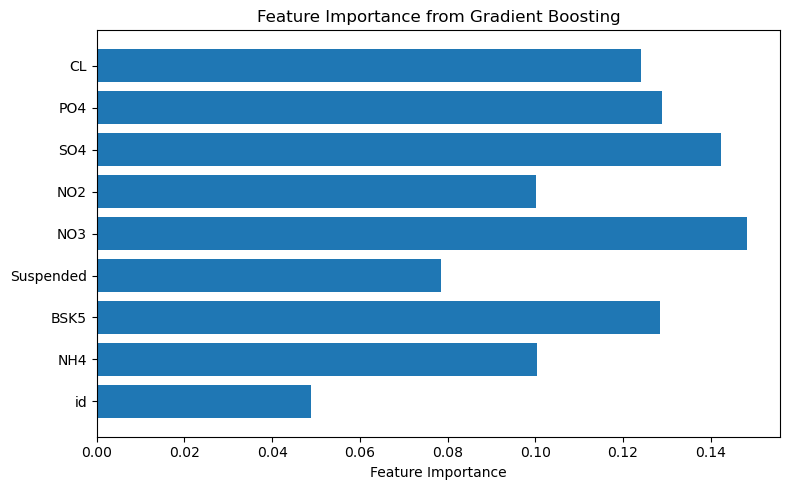

In [66]:
import matplotlib.pyplot as plt


features = X_numeric.columns
importances = gb.feature_importances_


plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Gradient Boosting")
plt.tight_layout()
plt.show()


###  6. Confusion Matrix Visualization

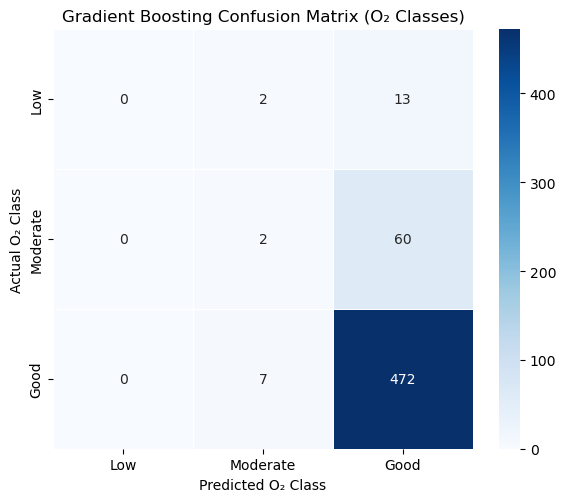


✅ Confusion Matrix – Interpretation for Water Quality Prediction Project

📌 Project Context:
The model predicts dissolved oxygen (O₂) levels in water, which are essential for determining the quality and safety of water.

📊 What the Confusion Matrix Shows:
- Each row represents the **actual O₂ category** (Low, Moderate, Good).
- Each column represents the **predicted O₂ category**.
- Diagonal values = **correct predictions**.
- Off-diagonal values = **misclassifications**.

🎯 Why It Matters:
- Accurate classification of O₂ levels ensures reliable water quality monitoring.
- Misclassifying **Low O₂ as Good** could result in **unsafe water being labeled as safe**, which can be dangerous to aquatic life and humans.
- A strong diagonal pattern in the matrix shows that the model is performing well.

🔍 Application Insight:
This matrix helps identify which O₂ levels are harder for the model to predict correctly. For example, if many Moderate samples are predicted as Good, it suggests improvem

In [73]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert continuous O₂ values into classes
def classify_o2_level(value):
    if value < 4:
        return 0  # Low
    elif value < 6.5:
        return 1  # Moderate
    else:
        return 2  # Good

# Apply classification to y_test and y_pred
y_test_class = np.array([classify_o2_level(val) for val in y_test])
y_pred_class = np.array([classify_o2_level(val) for val in y_pred])

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5, square=True)

plt.title("Gradient Boosting Confusion Matrix (O₂ Classes)")
plt.xlabel("Predicted O₂ Class")
plt.ylabel("Actual O₂ Class")
plt.xticks(ticks=[0.5,1.5,2.5], labels=['Low', 'Moderate', 'Good'])
plt.yticks(ticks=[0.5,1.5,2.5], labels=['Low', 'Moderate', 'Good'])
plt.tight_layout()
plt.show()

# Step 4: Explanation to be printed as output
explanation = """
✅ Confusion Matrix – Interpretation for Water Quality Prediction Project

📌 Project Context:
The model predicts dissolved oxygen (O₂) levels in water, which are essential for determining the quality and safety of water.

📊 What the Confusion Matrix Shows:
- Each row represents the **actual O₂ category** (Low, Moderate, Good).
- Each column represents the **predicted O₂ category**.
- Diagonal values = **correct predictions**.
- Off-diagonal values = **misclassifications**.

🎯 Why It Matters:
- Accurate classification of O₂ levels ensures reliable water quality monitoring.
- Misclassifying **Low O₂ as Good** could result in **unsafe water being labeled as safe**, which can be dangerous to aquatic life and humans.
- A strong diagonal pattern in the matrix shows that the model is performing well.

🔍 Application Insight:
This matrix helps identify which O₂ levels are harder for the model to predict correctly. For example, if many Moderate samples are predicted as Good, it suggests improvement is needed in boundary-level prediction accuracy.
"""

print(explanation)
